<a href="https://colab.research.google.com/github/BISHALSAHA21/ARTIFICIAL-INTELLIGENCE-AND-MACHINE_LEARNING/blob/main/Region_of_Interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# List files in /content
print(os.listdir('/content'))

['.config', 'IMG_20240908_234050.jpg', 'sample_data']


In [3]:
from google.colab import files

# Upload image
uploaded = files.upload()

# Access the uploaded file path
image_path = list(uploaded.keys())[0]
print(f"Uploaded image path: {image_path}")

Saving IMG_20240908_234050.jpg to IMG_20240908_234050 (1).jpg
Uploaded image path: IMG_20240908_234050 (1).jpg


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Then provide the path to your image from Google Drive
image_path = '/content/drive/MyDrive/your_image_path.jpg'

Mounted at /content/drive


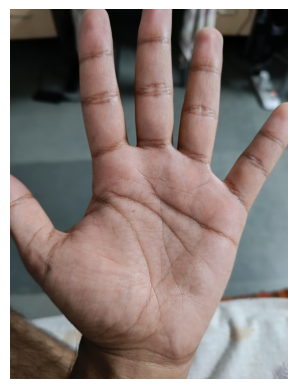

In [5]:
# Verify the path or upload the image manually if needed
import cv2
import matplotlib.pyplot as plt

# Load and display the image
def load_and_display_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img

# Provide correct image path
image_path = '/content/IMG_20240908_234050.jpg'

# Load the image and proceed
original_img = load_and_display_image(image_path)

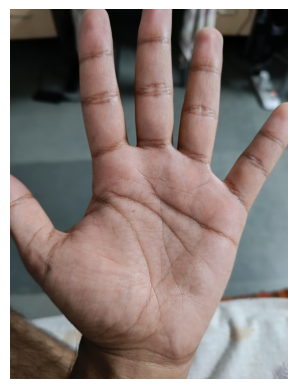

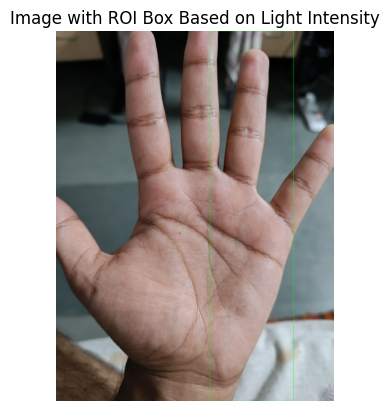

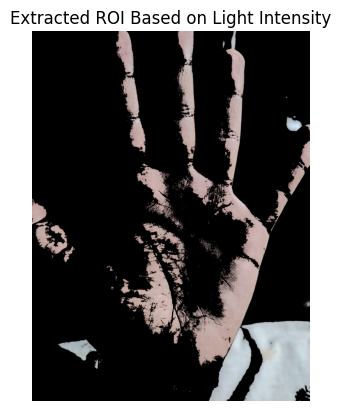

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and display the image
def load_and_display_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert to RGB for displaying with matplotlib (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    return img

# Function to extract ROI based on light intensity ranges
def extract_roi_based_on_light(img, lower_intensity, upper_intensity):
    # Convert the image to the HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Create a mask based on the given intensity range (value component of HSV)
    mask = cv2.inRange(hsv_img, lower_intensity, upper_intensity)

    # Use the mask to extract the region of interest
    roi = cv2.bitwise_and(img, img, mask=mask)

    # Find contours in the masked image
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If contours are found, draw a bounding box around the largest contour
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Convert to RGB for displaying
        img_rgb_with_box = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb_with_box)
        plt.axis('off')
        plt.title('Image with ROI Box Based on Light Intensity')
        plt.show()

    # Convert the ROI to RGB for displaying
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # Display the extracted ROI
    plt.imshow(roi_rgb)
    plt.axis('off')
    plt.title('Extracted ROI Based on Light Intensity')
    plt.show()

    return roi

# Example usage
image_path = '/content/IMG_20240908_234050.jpg'

# Load and display the image
original_img = load_and_display_image(image_path)

# Define the lower and upper bounds for light intensity in HSV
# Adjust the bounds based on your image characteristics
lower_intensity = np.array([0, 0, 180])  # Low intensity range for brightness
upper_intensity = np.array([255, 50, 255])  # High intensity range for brightness

# Extract and display the ROI based on the defined light intensity range
roi = extract_roi_based_on_light(original_img, lower_intensity, upper_intensity)

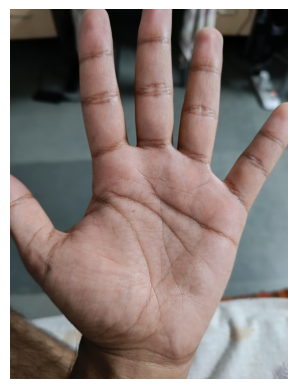

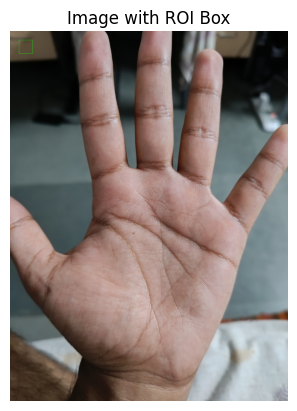

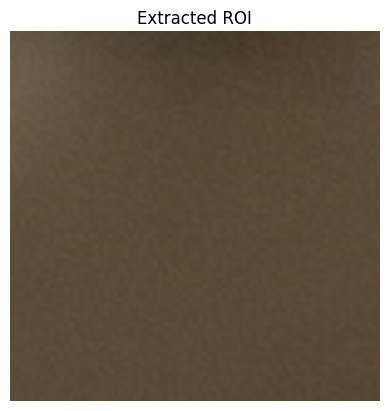

In [6]:
import cv2
import matplotlib.pyplot as plt

# Function to load and display the image
def load_and_display_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert to RGB for displaying with matplotlib (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    return img

# Function to extract a square ROI
def extract_square_roi(img, top_left, side_length):
    # Define the coordinates of the square
    x, y = top_left
    roi = img[y:y+side_length, x:x+side_length]

    # Draw a square box on the original image
    img_with_box = img.copy()
    cv2.rectangle(img_with_box, (x, y), (x + side_length, y + side_length), (0, 255, 0), 2)

    # Convert to RGB for displaying with matplotlib
    img_rgb_with_box = cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb_with_box)
    plt.axis('off')
    plt.title('Image with ROI Box')
    plt.show()

    # Convert the ROI to RGB for displaying
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # Display the ROI
    plt.imshow(roi_rgb)
    plt.axis('off')
    plt.title('Extracted ROI')
    plt.show()

    return roi

# Example usage
image_path = '/content/IMG_20240908_234050.jpg'

# Load and display the image
original_img = load_and_display_image(image_path)

# Specify the top-left corner and side length of the square (manually defined)
top_left = (100, 100)  # Adjust based on the image
side_length = 150      # Define the size of the square

# Extract and display the square ROI
roi = extract_square_roi(original_img, top_left, side_length)

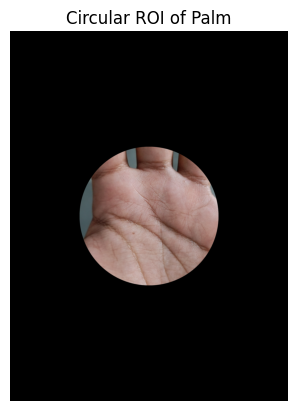

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the specified path
image_path = '/content/IMG_20240908_234050.jpg'
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Resize the image to a manageable size if needed (optional)
# img = cv2.resize(img, (300, 300))

# Get the dimensions of the image
height, width, _ = img.shape

# Define the center and radius of the circular mask
center = (width // 2, height // 2)
radius = min(center[0], center[1], width - center[0], height - center[1]) // 2  # Adjust radius as needed

# Create a black mask, and draw a white circle on it
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, center, radius, 255, -1)

# Apply the mask to the image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Convert the masked image to RGB for displaying in Matplotlib
masked_img_rgb = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

# Create a black background around the circle for aesthetic purposes
background = np.zeros_like(img)
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background_rgb[mask > 0] = masked_img_rgb[mask > 0]

# Display the final result
plt.imshow(background_rgb)
plt.axis('off')
plt.title('Circular ROI of Palm')
plt.show()

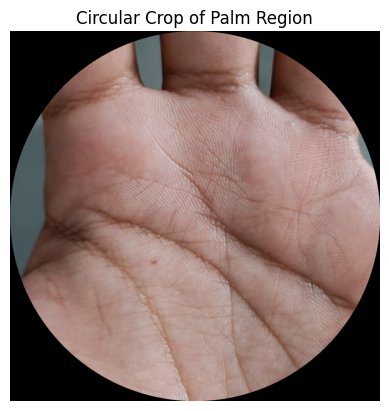

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the specified path
image_path = '/content/IMG_20240908_234050.jpg'
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Get the dimensions of the image
height, width, _ = img.shape

# Define the center and radius of the circular mask
center = (width // 2, height // 2)
radius = min(center[0], center[1], width - center[0], height - center[1]) // 2  # Adjust radius as needed

# Create a black mask, and draw a white circle on it
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, center, radius, 255, -1)

# Apply the mask to the image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Crop the circular region to remove black background
x = center[0] - radius
y = center[1] - radius
cropped_img = masked_img[y:y+2*radius, x:x+2*radius]

# Convert the cropped image to RGB for displaying in Matplotlib
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

# Display the cropped circular ROI
plt.imshow(cropped_img_rgb)
plt.axis('off')
plt.title('Circular Crop of Palm Region')
plt.show()